In [1]:
!pip install torch torchaudio transformers
!pip install datasets
!pip install torchviz
!pip install jiwer
!pip install torchsummary
!pip install onnx

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 55.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 48.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 33.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 63.9 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

# RNN-T

Model Components:
Feature Extractor:
_ModuleFeatureExtractor(
  (pipeline): Sequential(
    (0): MelSpectrogram(
      (spectrogram): Spectrogram()
      (mel_scale): MelScale()
    )
    (1): _FunctionalModule()
    (2): _FunctionalModule()
    (3): _GlobalStatsNormalization()
    (4): _FunctionalModule()
  )
)

Decoder:
RNNTBeamSearch(
  (model): RNNT(
    (transcriber): _EmformerEncoder(
      (input_linear): Linear(in_features=80, out_features=128, bias=False)
      (time_reduction): _TimeReduction()
      (transformer): Emformer(
        (memory_op): AvgPool1d(kernel_size=(4,), stride=(4,), padding=(0,))
        (emformer_layers): ModuleList(
          (0-19): 20 x _EmformerLayer(
            (attention): _EmformerAttention(
              (emb_to_key_value): Linear(in_features=512, out_features=1024, bias=True)
              (emb_to_query): Linear(in_features=512, out_features=512, bias=True)
              (out_proj): Linear(in_features=512, out_features=512, bias=True)
          

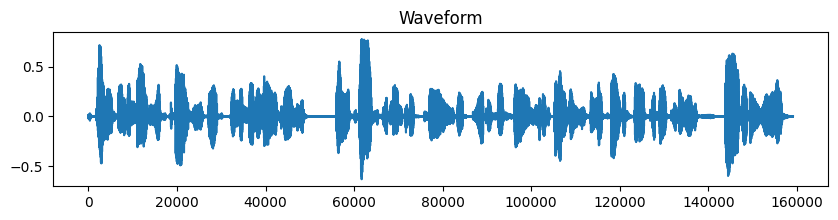

Transcription: and it was a matter of course that in the middle ages when the craftsmen took care that beautiful form should always be a part of their productions whatever they
Word Error Rate (WER): 1.1111111111111112


In [3]:
import torch
import torchaudio
import matplotlib.pyplot as plt
from torchaudio.pipelines import EMFORMER_RNNT_BASE_LIBRISPEECH
from jiwer import wer

# Load components from the pre-trained Emformer RNN-T pipeline
bundle = EMFORMER_RNNT_BASE_LIBRISPEECH
feature_extractor = bundle.get_feature_extractor()
decoder = bundle.get_decoder()
token_processor = bundle.get_token_processor()
print("Model Components:")
print(f"Feature Extractor:\n{feature_extractor}\n")
print(f"Decoder:\n{decoder}\n")
print(f"Token Processor:\n{token_processor}\n")

# Load the audio file
audio_path = "/content/LJ001-0014.wav"
waveform, sample_rate = torchaudio.load(audio_path)

# Resample to 16kHz
if sample_rate != 16000:
    resampler = torchaudio.transforms.Resample(orig_freq=sample_rate, new_freq=16000)
    waveform = resampler(waveform)

# Plot the waveform
plt.figure(figsize=(10, 2))
plt.plot(waveform[0].numpy())
plt.title("Waveform")
plt.show()

# Emformer expects 1D waveform for a single utterance
waveform = waveform.squeeze(0) if waveform.shape[0] == 1 else waveform

# Extract features
with torch.no_grad():
    features, length = feature_extractor(waveform)

# Decode top-10 hypotheses
hypotheses = decoder(features, length, beam_width=10)

# Process tokens to text
transcription = token_processor(hypotheses[0][0])
print("Transcription:", transcription)

# Evaluate against a reference
reference = "Printing in the only sense with which we are at present concerned differs from most if not from all the arts and crafts represented in the Exhibition"
error = wer(reference.lower(), transcription.lower())
print("Word Error Rate (WER):", error)


# Conformer

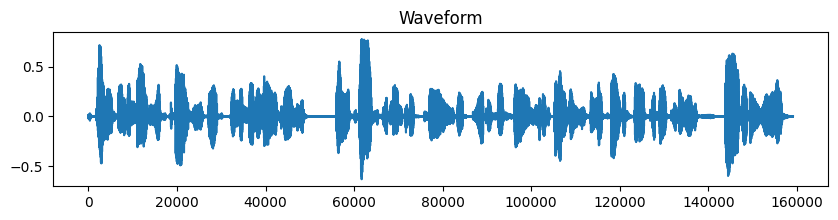

Transcription: AND IT WAS A MATTER OF COURSE THAT IN THE MIDDLE AGES WHEN THE CRAFTSMEN TOOK CARE THAT BEAUTIFUL FORMS SHOULD ALWAYS BE A PART OF THEIR PRODUCTIONS WHATEVER THEY WERE
Word Error Rate (WER): 1.1481481481481481
Wav2Vec2ConformerForCTC(
  (wav2vec2_conformer): Wav2Vec2ConformerModel(
    (feature_extractor): Wav2Vec2ConformerFeatureEncoder(
      (conv_layers): ModuleList(
        (0): Wav2Vec2ConformerLayerNormConvLayer(
          (conv): Conv1d(1, 512, kernel_size=(10,), stride=(5,))
          (layer_norm): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
          (activation): GELUActivation()
        )
        (1-4): 4 x Wav2Vec2ConformerLayerNormConvLayer(
          (conv): Conv1d(512, 512, kernel_size=(3,), stride=(2,))
          (layer_norm): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
          (activation): GELUActivation()
        )
        (5-6): 2 x Wav2Vec2ConformerLayerNormConvLayer(
          (conv): Conv1d(512, 512, kernel_size=(2,), stride=

In [18]:
import torch
import torchaudio
import matplotlib.pyplot as plt
from transformers import Wav2Vec2Processor, Wav2Vec2ConformerForCTC
from jiwer import wer

# Load Wav2Vec2-Conformer model
model_name = "facebook/wav2vec2-conformer-rope-large-960h-ft"  # Example model
processor = Wav2Vec2Processor.from_pretrained(model_name)
model = Wav2Vec2ConformerForCTC.from_pretrained(model_name)
model.eval()

# Load audio file
audio_path = "/content/LJ001-0014.wav"
waveform, sample_rate = torchaudio.load(audio_path)

# Resample to 16kHz if necessary
if sample_rate != 16000:
    waveform = torchaudio.transforms.Resample(orig_freq=sample_rate, new_freq=16000)(waveform)
    sample_rate = 16000

# Plot the waveform
plt.figure(figsize=(10, 2))
plt.plot(waveform.t().numpy())
plt.title("Waveform")
plt.show()

# Prepare the input for the model
inputs = processor(waveform.squeeze().numpy(), sampling_rate=sample_rate, return_tensors="pt", padding=True)

# Run the model inference
with torch.no_grad():
    outputs = model(**inputs)
    logits = outputs.logits

# Decode the output to get transcription
pred_ids = torch.argmax(logits, dim=-1)
transcription = processor.decode(pred_ids[0])

# Print the transcription and calculate WER
print("Transcription:", transcription)

# Reference text for WER calculation
reference = "Printing in the only sense with which we are at present concerned differs from most if not from all the arts and crafts represented in the Exhibition"
error = wer(reference.lower(), transcription.lower())
print("Word Error Rate (WER):", error)
print(model)


# Transformer + CTC (Wav2Vec2)

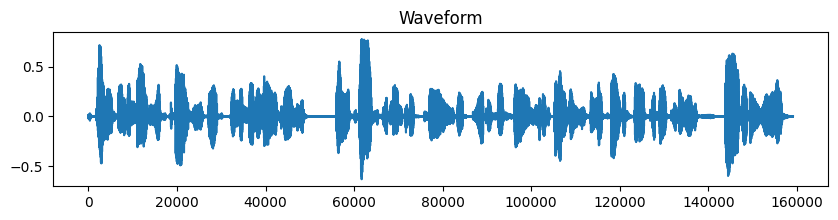

Some weights of Wav2Vec2ForCTC were not initialized from the model checkpoint at facebook/wav2vec2-base-960h and are newly initialized: ['wav2vec2.masked_spec_embed']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Transcription Output (Wav2Vec2 + CTC):
AND IT WAS A MATTER OF COURSE THAT IN THE MIDDLE AGES WHEN THE CRAFTSMEN TOOK CARE THAT BEAUTIFUL FORM SHOULD ALWAYS BE A PART OF THEIR PRODUCTIONS WHATEVER THEY WERE
Word Error Rate (WER): 1.1481481481481481
Wav2Vec2ForCTC(
  (wav2vec2): Wav2Vec2Model(
    (feature_extractor): Wav2Vec2FeatureEncoder(
      (conv_layers): ModuleList(
        (0): Wav2Vec2GroupNormConvLayer(
          (conv): Conv1d(1, 512, kernel_size=(10,), stride=(5,), bias=False)
          (activation): GELUActivation()
          (layer_norm): GroupNorm(512, 512, eps=1e-05, affine=True)
        )
        (1-4): 4 x Wav2Vec2NoLayerNormConvLayer(
          (conv): Conv1d(512, 512, kernel_size=(3,), stride=(2,), bias=False)
          (activation): GELUActivation()
        )
        (5-6): 2 x Wav2Vec2NoLayerNormConvLayer(
          (conv): Conv1d(512, 512, kernel_size=(2,), stride=(2,), bias=False)
          (activation): GELUActivation()
        )
      )
    )
    (feature_proje

In [19]:
import torch
import torchaudio
import matplotlib.pyplot as plt
from transformers import Wav2Vec2Processor, Wav2Vec2ForCTC
from jiwer import wer

# Step 1: Load and Resample Audio
audio_path = "/content/LJ001-0014.wav"
waveform, sample_rate = torchaudio.load(audio_path)

# Resample to 16kHz if not already
if sample_rate != 16000:
    waveform = torchaudio.transforms.Resample(orig_freq=sample_rate, new_freq=16000)(waveform)
    sample_rate = 16000

# Plot waveform
plt.figure(figsize=(10, 2))
plt.plot(waveform.t().numpy())
plt.title("Waveform")
plt.show()

# Step 2: Load Pretrained Wav2Vec2 Model and Processor
model_name = "facebook/wav2vec2-base-960h"  # Model can be changed if needed
processor = Wav2Vec2Processor.from_pretrained(model_name)
model = Wav2Vec2ForCTC.from_pretrained(model_name)
model.eval()

# Step 3: Prepare Input for Inference
# Wav2Vec2 expects the waveform to be in the format of batch_size x num_channels x sequence_length
inputs = processor(waveform.squeeze().numpy(), sampling_rate=sample_rate, return_tensors="pt", padding=True)

# Step 4: Inference (Forward Pass)
with torch.no_grad():
    outputs = model(**inputs)
    logits = outputs.logits

# Step 5: Decode the Logits to Text
# Take argmax of logits to get the predicted token IDs
pred_ids = torch.argmax(logits, dim=-1)

# Decode the token IDs into human-readable transcription
transcription = processor.decode(pred_ids[0])

# Output the transcription
print("Transcription Output (Wav2Vec2 + CTC):")
print(transcription)

# Step 6: Word Error Rate (WER) Calculation
# Reference text for evaluation (the ground truth transcription)
reference = "Printing in the only sense with which we are at present concerned differs from most if not from all the arts and crafts represented in the Exhibition"
error = wer(reference.lower(), transcription.lower())

# Output WER
print("Word Error Rate (WER):", error)
print(model)
